In [1]:
import pandas as pd

# Create a dataset
data = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        'Sales': [150, 200, 180, 220, 250]}

df = pd.DataFrame(data)

# Descriptive statistics
mean = df['Sales'].mean()
median = df['Sales'].median()
mode = df['Sales'].mode()[0]
std_dev = df['Sales'].std()
min_val = df['Sales'].min()
max_val = df['Sales'].max()

# Print results
print(f"Mean: £{mean}")
print(f"Median: £{median}")
print(f"Mode: £{mode}")
print(f"Standard Deviation: £{std_dev:.2f}")
print(f"Min: £{min_val}, Max: £{max_val}")


Mean: £200.0
Median: £200.0
Mode: £150
Standard Deviation: £38.08
Min: £150, Max: £250


In [3]:
import pandas as pd

# Load times dataset
load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

# Calculate mean and median
mean = pd.Series(load_times).mean()
median = pd.Series(load_times).median()
mode = pd.Series(load_times).mode()[0]
std_dev = pd.Series(load_times).std()

print(f"Mean load time: {mean:.2f} seconds")
print(f"Median load time: {median:.2f} seconds")
print(f"Mode load time: {mode:.2f} seconds")
print(f"Standard Deviation of load times: {std_dev:.2f} seconds")


Mean load time: 13.00 seconds
Median load time: 1.90 seconds
Mode load time: 1.20 seconds
Standard Deviation of load times: 29.55 seconds


In [4]:
import pandas as pd

load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

series = pd.Series(load_times)

mode = series.mode()[0]         # Mode
std_dev = series.std()          # Standard deviation
range_val = series.max() - series.min()  # Range

print(f"Mode: {mode} seconds")
print(f"Standard Deviation: {std_dev:.2f} seconds")
print(f"Range: {range_val} seconds")


Mode: 1.2 seconds
Standard Deviation: 29.55 seconds
Range: 78.8 seconds


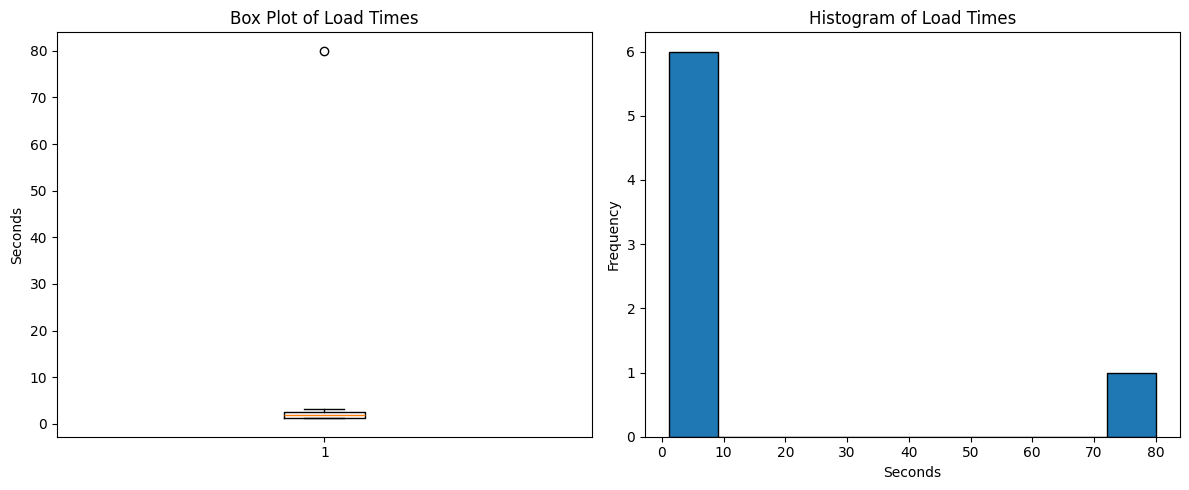

In [5]:
import matplotlib.pyplot as plt

load_times = [1.2, 1.5, 2.0, 1.2, 3.2, 1.9, 80]

plt.figure(figsize=(12,5))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(load_times, vert=True)
plt.title('Box Plot of Load Times')
plt.ylabel('Seconds')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(load_times, bins=10, edgecolor='black')
plt.title('Histogram of Load Times')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Descriptive Statistics for Goals:
count     7.00000
mean      5.00000
std       3.91578
min       0.00000
25%       2.50000
50%       5.00000
75%       6.50000
max      12.00000
Name: Goals, dtype: float64

Median Goals: 5.0
Mode Goals: 0


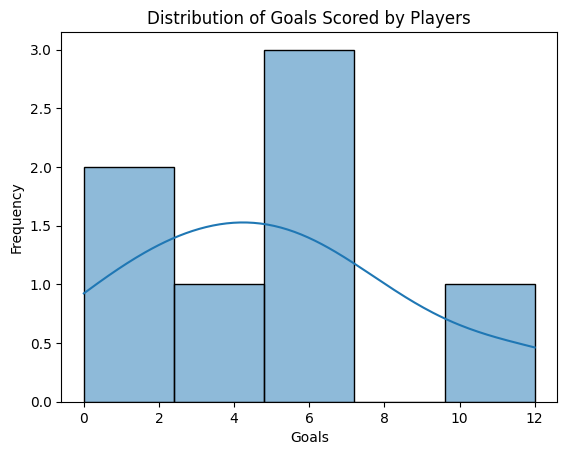

<Axes: xlabel='Goals', ylabel='Assists'>

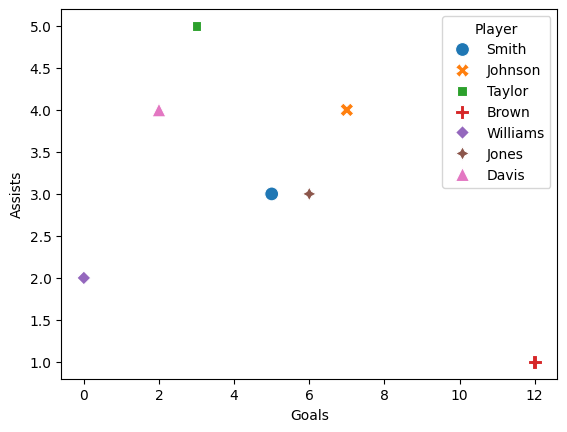

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: player goals in a season
data = {
    'Player': ['Smith', 'Johnson', 'Taylor', 'Brown', 'Williams', 'Jones', 'Davis'],
    'Goals': [5, 7, 3, 12, 0, 6, 2],
    'Assists': [3, 4, 5, 1, 2, 3, 4],
    'Appearances': [30, 28, 32, 25, 34, 31, 29]
}

df = pd.DataFrame(data)

# Calculate descriptive statistics
print("Descriptive Statistics for Goals:")
print(df['Goals'].describe())

print("\nMedian Goals:", df['Goals'].median())
print("Mode Goals:", df['Goals'].mode()[0])

# Visualize Goals distribution
sns.histplot(df['Goals'], bins=5, kde=True)
plt.title('Distribution of Goals Scored by Players')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()
# Visualize Goals vs Assists
sns.scatterplot(data=df, x='Goals', y='Assists', hue='Player', style='Player', s=100)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (use latin-1 to allow non-UTF8 bytes like 0xA0)
df = pd.read_csv("../Data/results.csv", encoding='latin-1')

# Quick look at the dataset
print(df.head())
print(df.columns)

# Rename for convenience if needed
df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result', 'Attendance': 'Attendance'}, inplace=True)

# 1. Match outcome analysis
result_counts = df['Result'].value_counts()
print("Match Results Count:\n", result_counts)

# 2. Average goals
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
avg_goals = df['TotalGoals'].mean()
print(f"Average goals per match: {avg_goals:.2f}")

# 3. Median attendance
df.columns = df.columns.str.strip()
median_attendance = df['Attendance'].median()
print(f"Median attendance: {median_attendance}")

# 4. Outlier detection in attendance
q1 = df['Attendance'].quantile(0.25)
q3 = df['Attendance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Attendance'] < lower_bound) | (df['Attendance'] > upper_bound)]
print("Outlier Attendances:\n", outliers[['HomeTeam', 'AwayTeam', 'Attendance']])

# 5. Visualizations

# Bar chart: Match results
plt.figure(figsize=(6,4))
result_counts.plot(kind='bar', color='skyblue')
plt.title("Match Results (W/D/L)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

# Boxplot: Attendance
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Attendance'])
plt.title("Attendance Distribution")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()

# Scatterplot: Goals vs Attendance
plt.figure(figsize=(6,4))
sns.scatterplot(x='TotalGoals', y='Attendance', data=df)
plt.title("Goals vs Attendance")
plt.xlabel("Total Goals")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()


    Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   H   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   D   

   HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 23 columns]
Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG

KeyError: 'Attendance'

Match Results Count:
 Result
H    5088
A    3161
D    2864
Name: count, dtype: int64
Average goals per match: 2.66
Column 'Attendance' not found; skipping attendance analysis.


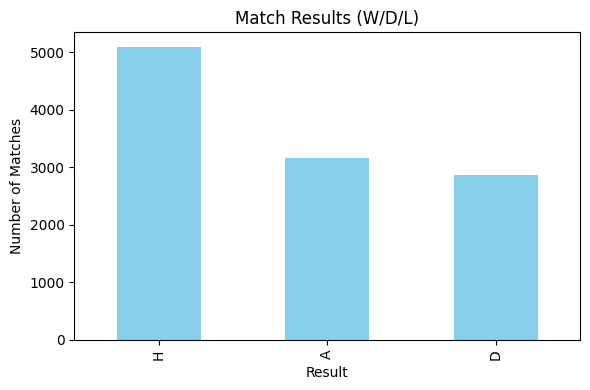

In [20]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename for convenience (only actual columns)
df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'}, inplace=True)

# 1. Match outcome analysis
result_counts = df['Result'].value_counts()
print("Match Results Count:\n", result_counts)

# 2. Average goals
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
avg_goals = df['TotalGoals'].mean()
print(f"Average goals per match: {avg_goals:.2f}")

# 3 & 4. Attendance analysis (if column exists)
if 'Attendance' in df.columns:
    # Median attendance
    median_attendance = df['Attendance'].median()
    print(f"Median attendance: {median_attendance}")

    # Outlier detection in attendance
    q1 = df['Attendance'].quantile(0.25)
    q3 = df['Attendance'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['Attendance'] < lower_bound) | (df['Attendance'] > upper_bound)]
    print("Outlier Attendances:\n", outliers[['HomeTeam', 'AwayTeam', 'Attendance']])
else:
    print("Column 'Attendance' not found; skipping attendance analysis.")

# 5. Visualizations

# Bar chart: Match results
plt.figure(figsize=(6,4))
result_counts.plot(kind='bar', color='skyblue')
plt.title("Match Results (W/D/L)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

# Attendance visualizations (only if column exists)
if 'Attendance' in df.columns:
    # Boxplot: Attendance
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df['Attendance'])
    plt.title("Attendance Distribution")
    plt.ylabel("Attendance")
    plt.tight_layout()
    plt.show()

    # Scatterplot: Goals vs Attendance
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='TotalGoals', y='Attendance', data=df)
    plt.title("Goals vs Attendance")
    plt.xlabel("Total Goals")
    plt.ylabel("Attendance")
    plt.tight_layout()
    plt.show()

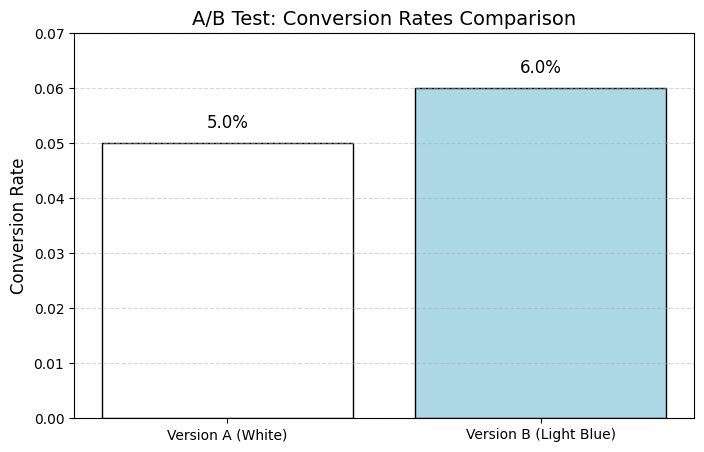

In [1]:
import matplotlib.pyplot as plt

# Data
versions = ['Version A (White)', 'Version B (Light Blue)']
conversion_rates = [250/5000, 300/5000]  # 5% and 6%

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(versions, conversion_rates, color=['white', 'lightblue'], edgecolor='black')
plt.title('A/B Test: Conversion Rates Comparison', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=12)
plt.ylim(0, 0.07)

# Add percentages on bars
for bar, rate in zip(bars, conversion_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002, f'{rate*100:.1f}%', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [5]:
pip install pingouin

  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
  Using cached pandas_flavor-0.7.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/10.7 MB 20.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 21.5 MB/s eta 0:00:00
Using cached pandas_flavor-0.7.0-py3-none-any.whl (8.4 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Descriptive Statistics:
       Sales_wout_ad  Sales_with_ad  Differences in sales
count      60.000000      60.000000             60.000000
mean       26.966991      31.884004              4.917012
std         4.415282      10.658547             12.017531
min        13.733407      10.509427            -21.929127
25%        24.504857      24.167776             -2.944220
50%        27.138468      31.717059              5.479667
75%        30.037982      39.373996             12.046083
max        35.747274      53.018563             34.439118

Normality Check:
                             W      pval  normal
Sales_wout_ad         0.987189  0.782308    True
Sales_with_ad         0.983211  0.578144    True
Differences in sales  0.989345  0.880458    True


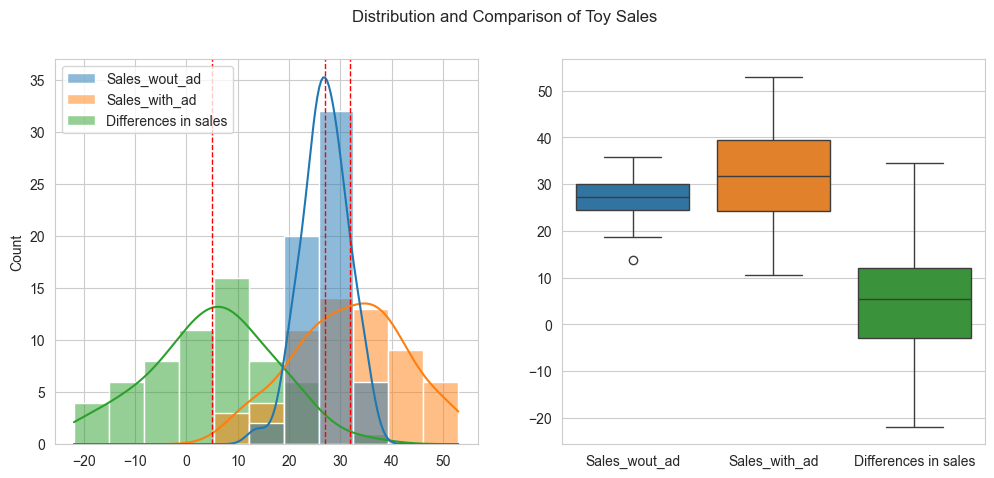


T-test Result:
               T  dof alternative     p-val        CI95%   cohen-d    BF10  \
T-test  3.169288   59     greater  0.001211  [2.32, inf]  0.409153  24.303   

           power  
T-test  0.931594  

P-value: 0.00121
Mean Difference in Sales: 4.92
95% Confidence Interval: [1.81 8.02]


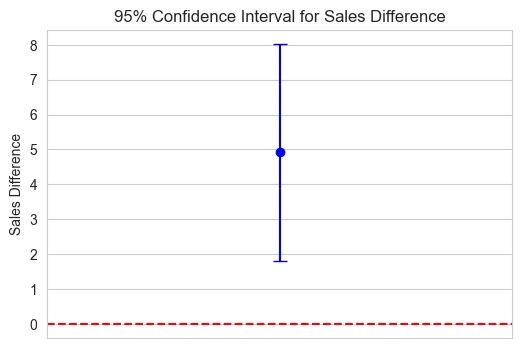


Economic Analysis:
Daily Additional Revenue: $49.17
Monthly Additional Revenue: $1475.10
Monthly Net Gain/Loss: $-24.90

Conclusion: The ad has a statistically significant effect on toy sales.
However, the campaign currently results in a financial loss.


In [6]:
# A/B Test Implementation: Do In-Store Ads Increase Toy Sales?

# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
from scipy import stats

# ------------------------------
# Step 1: Simulate Data
# ------------------------------
np.random.seed(11)
size = 60

# Generate toy sales data
df = pd.DataFrame({
    'Sales_wout_ad': np.random.normal(loc=27, scale=5, size=size),
    'Sales_with_ad': np.random.normal(loc=31, scale=10, size=size)
})

# Calculate differences
df['Differences in sales'] = df['Sales_with_ad'] - df['Sales_wout_ad']

# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# ------------------------------
# Step 2: Normality Check
# ------------------------------
print("\nNormality Check:")
print(pg.normality(data=df, alpha=0.05))

# ------------------------------
# Step 3: Visualization
# ------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data=df, kde=True, ax=axes[0])
for col in df.columns:
    axes[0].axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=1)
sns.boxplot(data=df, ax=axes[1])
plt.suptitle('Distribution and Comparison of Toy Sales')
plt.show()

# ------------------------------
# Step 4: Statistical Test
# ------------------------------
ttest_result = pg.ttest(x=df['Differences in sales'], y=0, alternative='greater')
print("\nT-test Result:")
print(ttest_result)

# Extract p-value and confidence interval
p_value = ttest_result.loc['T-test', 'p-val']
confidence_interval = pg.ttest(df['Differences in sales'], 0).loc['T-test','CI95%']
mean_diff = df['Differences in sales'].mean()

print(f"\nP-value: {p_value:.5f}")
print(f"Mean Difference in Sales: {mean_diff:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")

# ------------------------------
# Step 5: Confidence Interval Plot
# ------------------------------
plt.figure(figsize=(6, 4))
plt.errorbar(x=0, y=mean_diff, yerr=[[mean_diff - confidence_interval[0]], [confidence_interval[1] - mean_diff]],
             fmt='o', color='blue', capsize=5)
plt.axhline(0, color='red', linestyle='--')
plt.title('95% Confidence Interval for Sales Difference')
plt.ylabel('Sales Difference')
plt.xticks([])
plt.grid(True)
plt.show()

# ------------------------------
# Step 6: Economic Analysis
# ------------------------------
toy_price = 10
ad_cost = 1500

daily_revenue = mean_diff * toy_price
monthly_revenue = daily_revenue * 30
net_profit = monthly_revenue - ad_cost

print("\nEconomic Analysis:")
print(f"Daily Additional Revenue: ${daily_revenue:.2f}")
print(f"Monthly Additional Revenue: ${monthly_revenue:.2f}")
print(f"Monthly Net Gain/Loss: ${net_profit:.2f}")

# ------------------------------
# Step 7: Conclusion Summary
# ------------------------------
if p_value < 0.05:
    print("\nConclusion: The ad has a statistically significant effect on toy sales.")
else:
    print("\nConclusion: The ad does NOT have a statistically significant effect on toy sales.")

if net_profit < 0:
    print("However, the campaign currently results in a financial loss.")
else:
    print("The campaign is profitable in the short term.")
# ------------------------------